In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x00000243BE03A5F0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from matplotlib.image import imread

Der Code funktioniert irgendwie nicht gut, da kommen immer mega kleine Werte raus und ich weiß nicht warum...

In [20]:
def dice_score(pred, gt):
    """
    This function calculates the similarity between two arrays.
    :param pred: an array of predicted labels
    :param gt: the ground truth of this array
    :return: a value between 0 and 1, describing the similarity between those arrays. 1 is the dice score of
    similar arrays.
    """
    dice = np.sum(pred[gt == pred]) * 2.0 / (np.sum(gt) + np.sum(pred))
    print("Dice similarity score is {}".format(dice))


if __name__ == '__main__':
    img1 = np.asarray(imread("../data/test_out2.png"))
    img2 = np.asarray(imread('../data/Cell_Nuclei_gt_new2.jpg'))
    dice_score(img1, img2)

Dice similarity score is 3.360241575383402e-06


Das funktioniert besser :) (naja, irgendwie ist der Code ja doch komisch....)

In [26]:
import cv2
import numpy as np

#load images
y_pred = cv2.imread('../data/test_out2.png')
y_true = cv2.imread('../data/Cell_Nuclei_gt_new2.jpg') 

# Dice similarity function
def dice(pred, true, k ):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

dice_score = dice(y_pred, y_true, 255) #255: white, 0: black
print ("Dice Similarity: {}".format(dice_score))

Dice Similarity: 0.9508734266193473


An den Histogrammen sieht man, dass es in den gt images graue Pixel gibt -> jetzt sieht man bei den neuen gt-Images, dass die grauen Pixel weg sind juhuuu :)

(array([1635417.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1510311.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

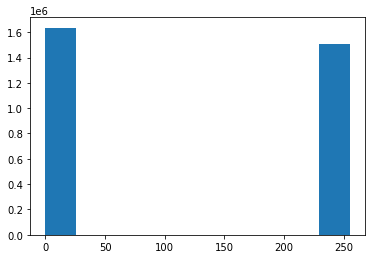

In [17]:
y_pred = cv2.imread('../data/test_out2.png')
y_true = cv2.imread('../data/Yeast_Cells_gt_new.jpg') 

hist(y_pred.flatten())


(array([2.873970e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.100000e+01, 1.140000e+02, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.445895e+06]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

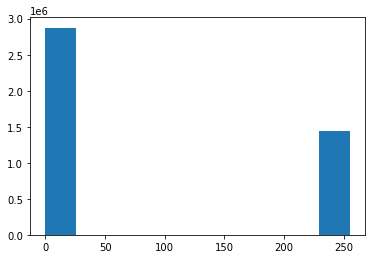

In [ ]:
hist(y_true.flatten())

Version that should actually work :^)

In [56]:
def dice1(gt, img):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    h = gt.shape[0]
    w = gt.shape[1]
    for i, j in np.ndindex((h, w)):
        if gt[i, j][0] == 255:
            if img[i, j][0] == 255:
                tp += 1
            else:
                fn += 1
        else:
            if img[i, j][0] == 255:
                fp += 1
            else:
                tn += 1
    dsc = 2* tp / (2*tp + fn + fp)
    return dsc

In [57]:
y_pred = cv2.imread('../data/test_out2.png')
y_true = cv2.imread('../data/Yeast_Cells_gt_new.jpg') 
dice1(y_true, y_pred)

0.778036280703594